In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sb

In [4]:
weather = pd.read_csv('fiveyearsweatherdata.csv')
X = weather['Temperature']
y = weather['Relative Humidity']

In [5]:
str(X[0])

'19.9'

In [7]:
weather.head()

,Address,Date,time,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,...,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Latitude,Longitude,Resolved Address,Name,Info,Conditions
0,"Kolkata,West Bengal,India",01-01-2017,NaN,25.3,19.9,16.5,82.47,NaN,5.8,NaN,...,1.2,4.9,1015.9,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
1,"Kolkata,West Bengal,India",02-01-2017,NaN,26.0,20.6,16.0,76.76,NaN,8.1,NaN,...,1.4,0.3,1015.6,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
2,"Kolkata,West Bengal,India",03-01-2017,NaN,27.0,21.1,15.6,73.12,27.3,9.2,NaN,...,1.6,10.7,1014.7,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
3,"Kolkata,West Bengal,India",04-01-2017,NaN,25.0,19.9,14.5,72.57,NaN,8.1,NaN,...,1.8,2.3,1014.6,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
4,"Kolkata,West Bengal,India",05-01-2017,NaN,25.6,19.6,13.7,71.88,NaN,8.1,NaN,...,1.9,0.0,1013.7,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear


In [8]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Address              1826 non-null   object 
 1   Date                 1826 non-null   object 
 2   time                 0 non-null      float64
 3   Maximum Temperature  1826 non-null   float64
 4   Temperature          1826 non-null   float64
 5   Dew Point            1826 non-null   float64
 6   Relative Humidity    1826 non-null   float64
 7   Heat Index           1538 non-null   float64
 8   Wind Speed           1826 non-null   float64
 9   Wind Gust            54 non-null     float64
 10  Wind Direction       1826 non-null   float64
 11  Wind Chill           13 non-null     float64
 12  Precipitation        1826 non-null   float64
 13  Precipitation Cover  1826 non-null   float64
 14  Snow Depth           1826 non-null   int64  
 15  Visibility           1826 non-null   f

In [9]:
weather.describe()

,time,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,Wind Direction,Wind Chill,Precipitation,Precipitation Cover,Snow Depth,Visibility,Cloud Cover,Sea Level Pressure,Latitude,Longitude,Info
count,0.0,1826.000000,1826.000000,1826.000000,1826.000000,1538.000000,1826.000000,54.000000,1826.000000,13.000000,1826.000000,1826.000000,1826.0,1826.000000,1826.000000,1825.000000,1.826000e+03,1826.0000,0.0
mean,NaN,31.460022,26.628697,21.713527,76.602141,40.740182,11.097974,30.938889,151.183899,8.730769,4.650783,4.180986,0.0,2.019496,40.459693,1007.906411,2.257050e+01,88.3713,NaN
std,NaN,4.195294,4.473758,5.628949,10.552180,7.871842,6.294325,6.461772,51.267895,0.712255,13.994448,6.317213,0.0,0.316475,27.677867,6.050940,3.553687e-15,0.0000,NaN
min,NaN,18.000000,14.200000,5.800000,41.150000,26.300000,3.400000,20.800000,20.950000,7.600000,0.000000,0.000000,0.0,0.700000,0.000000,988.400000,2.257050e+01,88.3713,NaN
25%,NaN,29.000000,23.600000,17.100000,69.145000,34.100000,8.100000,26.725000,113.330000,7.900000,0.000000,0.000000,0.0,1.800000,14.325000,1003.100000,2.257050e+01,88.3713,NaN
50%,NaN,32.000000,28.200000,23.900000,77.410000,42.100000,10.300000,28.900000,153.810000,8.800000,0.000000,0.000000,0.0,2.100000,44.300000,1008.100000,2.257050e+01,88.3713,NaN
75%,NaN,35.000000,30.000000,26.500000,85.037500,46.700000,12.800000,34.400000,189.450000,9.100000,1.630000,8.330000,0.0,2.200000,62.600000,1013.100000,2.257050e+01,88.3713,NaN
max,NaN,41.000000,34.800000,30.100000,97.230000,61.200000,123.300000,55.300000,331.380000,9.600000,232.770000,34.780000,0.0,3.200000,100.000000,1019.700000,2.257050e+01,88.3713,NaN


In [10]:
ax = np.array(X).reshape(-1,1)
by = np.array(y).reshape(-1,1)

In [11]:
ax_train,ax_test,by_train,by_test = train_test_split(ax,by,test_size=0.2,random_state=0)

In [12]:
mod = LinearRegression()
mod.fit(ax_train,by_train)

LinearRegression()

In [13]:
prediction = mod.predict([[25]])
prediction

array([[75.4236253]])

In [14]:
b = mod.intercept_
b

array([60.05546361])

In [15]:
m = mod.coef_
m

array([[0.61472647]])

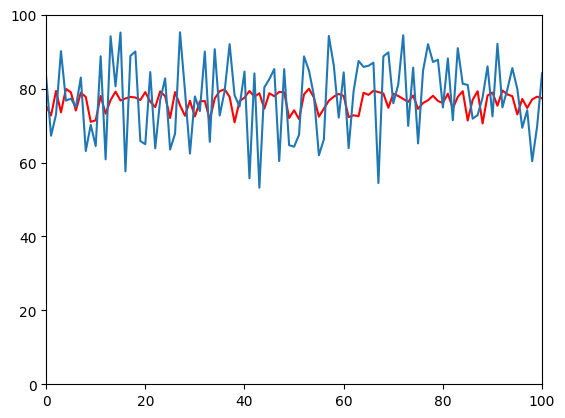

In [16]:
#Scatter plot betwn. 'Acctual Relative Humidity'vs 'Predicted Relative Humidity'
y_pred = m*ax_test + b
plt.plot(y_pred,color='red')
plt.plot(by_test)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

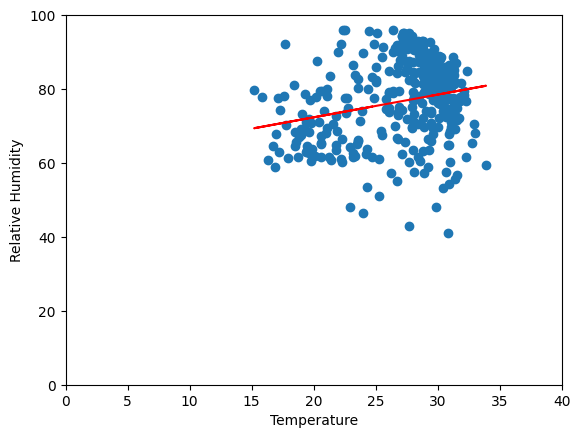

In [17]:
#Scatter plot between 'Temparature(Test)' Vs 'Relative Humidity(Test)'
plt.plot(ax_test,by_test,'o')

#Regression Line
y_pred = m*ax_test + b
plt.plot(ax_test,y_pred,color='r')

#scale
plt.xlim(0,40)
plt.xlabel("Temperature")
plt.ylim(0,100)
plt.ylabel("Relative Humidity")
plt.show()

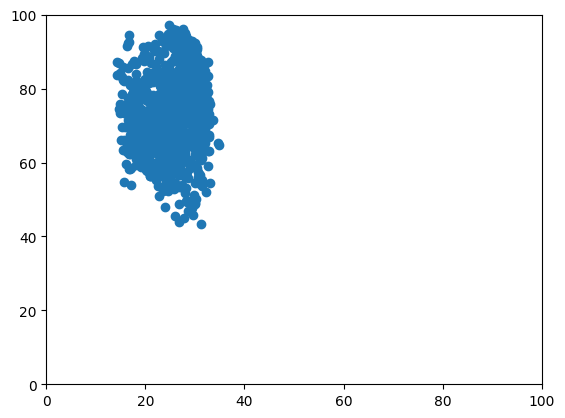

In [18]:
#Scatter plot between 'Temparature(Train)' Vs 'Relative Humidity(Train)'
plt.plot(ax_train,by_train,'o')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()